In [0]:
import pandas as pd

In [0]:
DATA_PATH = "/content/antibiotic"
USING_REEVAL = True
FAILURE_RATE_COL = "failurerate_reeval" if USING_REEVAL else "failurerate"
FAILURE_RATE_COL += "_x100"

EXPERIMENT = {"series" : ("constrained-combined.pkl",
                          "unconstrained-combined.pkl"),
              "objectives" : (FAILURE_RATE_COL,
                              "totalantibiotic",
                              "maximumconcentration",
                              "actual_len")
             }

CONSTRAINED_LIMIT = 0.01 # In the range [0.0, 1.0]
MAX_FAILURE_RATES = (None, CONSTRAINED_LIMIT)

In [0]:
# Display text for columns
OBJECTIVE_TITLES = {"failurerate"             : "Failure Rate",
                    "failurerate_reeval"      : "Failure Rate - Re-Eval",
                    "failurerate_x100"        : "Failure Rate (%)",
                    "failurerate_reeval_x100" : "Failure Rate (%) - Re-Eval",
                    "maximumconcentration"    : "Maximum Concentration (µg/ml)",
                    "totalantibiotic"         : "Total Antibiotic (µg/ml)",
                    "actual_len"              : "Treatment Duration (days)"}

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
def spearman(x, y, **kwargs):
    correlation, significance = stats.spearmanr(x, y)
    correlation = "%.2f" % correlation
    if significance < 0.001:
        correlation = str(correlation) + "***"
    elif significance < 0.01:
        correlation = str(correlation) + "**"
    elif significance < 0.05:
        correlation = str(correlation) + "*"
    ax = plt.gca()
    ax.set_axis_off()
    ax.annotate(s=correlation,
                xy=(0.5, 0.5),
                fontsize=24,
                xycoords="axes fraction",
                ha='center',
                va='center')

In [0]:
dataframes = [None] * len(EXPERIMENT["series"])

for i, series in enumerate(EXPERIMENT["series"]):
    load_from = DATA_PATH + "/" + series
    dataframes[i] = pd.read_pickle(load_from)[list(EXPERIMENT['objectives'])]
    dataframes[i].columns = map(lambda x : OBJECTIVE_TITLES[x],
                                dataframes[i].columns)

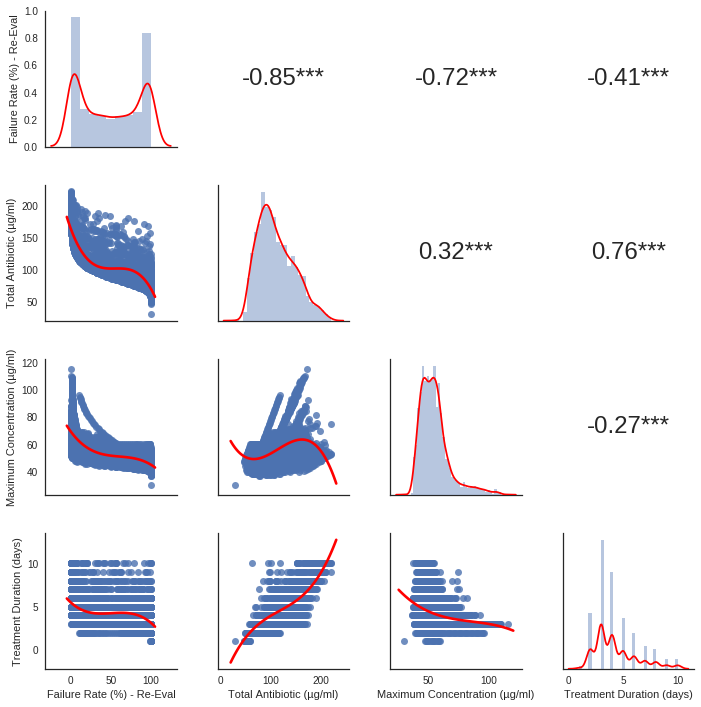

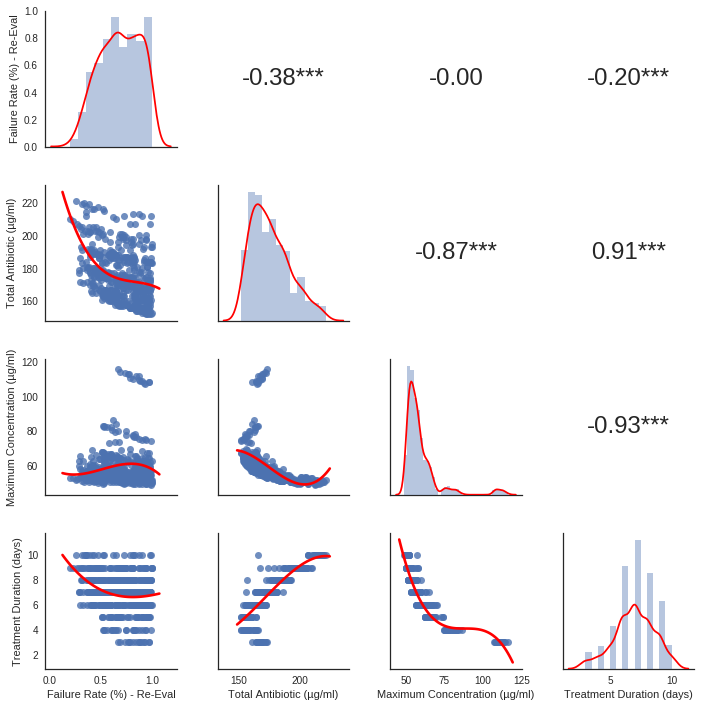

In [112]:
for i in range(2):
    g = sns.PairGrid(dataframes[i], aspect=1.0, diag_sharey=False)
    g.map_lower(sns.regplot, order=3, ci=False, line_kws={'color': 'red'})
    g.map_diag(sns.distplot, kde_kws={'color': 'red'})
    g.map_upper(spearman)